<a href="https://colab.research.google.com/github/sana1410/Python-Projects/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Project to showcase the use of Linear Regression machine learning model for predicting the price of laptops of a given specification .
The Dataset cab be found [here](https://www.kaggle.com/datasets/mohidabdulrehman/laptop-price-dataset)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
laptop_data=pd.read_csv('/content/laptop_data.csv')

In [ ]:
laptop_data

,SI.No,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [ ]:
laptop_data.shape

(1303, 12)

In [ ]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SI.No             1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [ ]:
laptop_data.describe()

,SI.No,Inches,Weight,Price
count,1303.00000,1303.000000,1303.000000,1303.000000
mean,651.00000,15.017191,2.038726,59870.042910
std,376.28801,1.426304,0.665481,37243.201786
min,0.00000,10.100000,0.690000,9270.720000
25%,325.50000,14.000000,1.500000,31914.720000
50%,651.00000,15.600000,2.040000,52054.560000
75%,976.50000,15.600000,2.300000,79274.246400
max,1302.00000,18.400000,4.700000,324954.720000


In [ ]:
laptop_data.nunique()

SI.No               1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               168
Price                791
dtype: int64

In [ ]:
laptop_data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
laptop_data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
laptop_data['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [ ]:
laptop_data['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [ ]:
laptop_data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
laptop_data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
laptop_data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

# Data Cleaning

## Dropping the columns that are not required

In [ ]:
laptop_data_1=laptop_data.drop("SI.No",axis=1,inplace=True)

## Dropping the unnecessary names of laptop companies

In [ ]:
laptop_data_1=laptop_data[(laptop_data['Company']=='Dell')|(laptop_data['Company']=='Lenovo')|(laptop_data['Company']=='HP')|(laptop_data['Company']=='Asus')|(laptop_data['Company']=='Acer')|(laptop_data['Company']=='MSI')|(laptop_data['Company']=='Toshiba')]

## Dropping the unnecessary operating systems

In [ ]:
laptop_data_1=laptop_data_1[(laptop_data_1['OpSys'] !="Android")&(laptop_data_1['OpSys'] !="Windows 10 S")]

In [ ]:
laptop_data_1.shape

(1227, 11)

In [ ]:
laptop_data_1['Company'].value_counts()

Dell       297
Lenovo     295
HP         274
Asus       156
Acer       103
MSI         54
Toshiba     48
Name: Company, dtype: int64

In [ ]:
laptop_data_1['OpSys'].value_counts()

Windows 10    1035
No OS           63
Linux           62
Windows 7       45
Chrome OS       22
Name: OpSys, dtype: int64

## EDA

### Boxplots

Text(0.5, 1.0, 'Boxplot Showing Average price in various laptop companies')

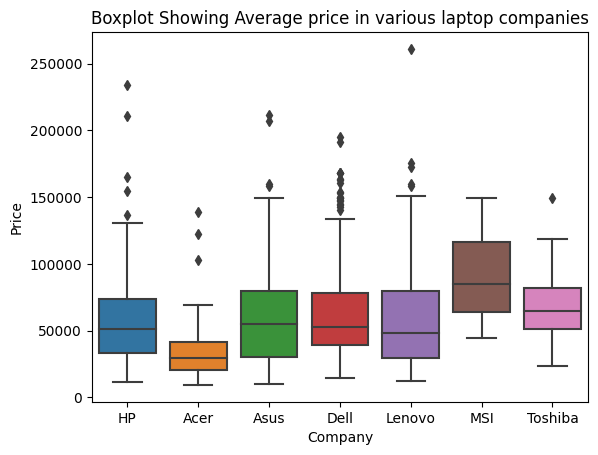

In [ ]:
sns.boxplot(x='Company',y='Price',data=laptop_data_1)
plt.title('Boxplot Showing Average price in various laptop companies')

Text(0.5, 1.0, 'Boxplot Showing Average price in various operating system')

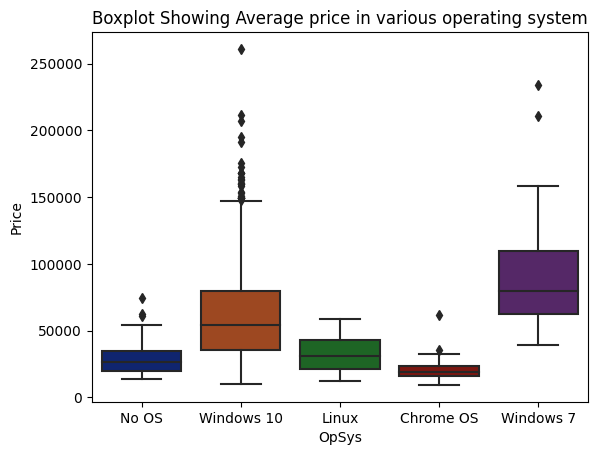

In [ ]:
sns.boxplot(x='OpSys',y='Price',data=laptop_data_1,palette='dark')
plt.title('Boxplot Showing Average price in various operating system')

Text(0.5, 1.0, 'Boxplot Showing Average price in various Type Name')

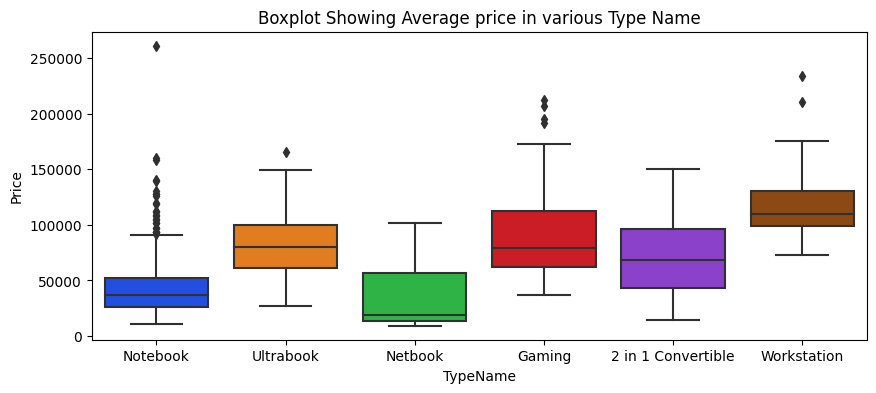

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='TypeName',y='Price',data=laptop_data_1,palette='bright')
plt.title('Boxplot Showing Average price in various Type Name')

Text(0.5, 1.0, 'Boxplot Showing Average price in various Ram')

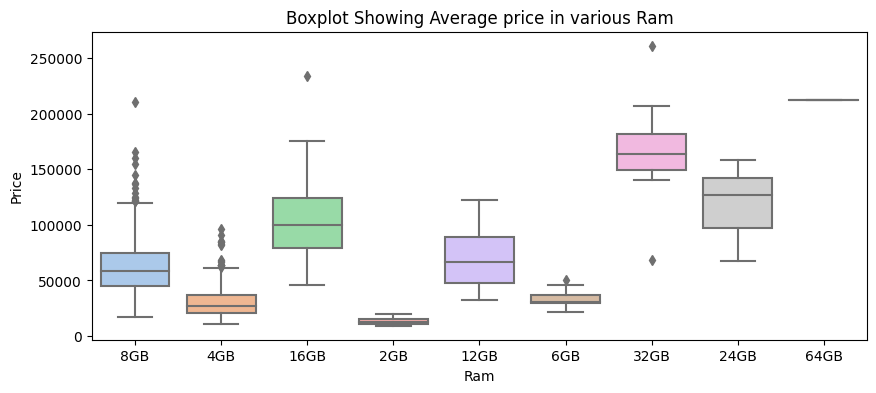

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Ram',y='Price',data=laptop_data_1,palette='pastel')
plt.title('Boxplot Showing Average price in various Ram')

### Barplots

Text(0.5, 1.0, 'Barplot Showing Average price in various Types')

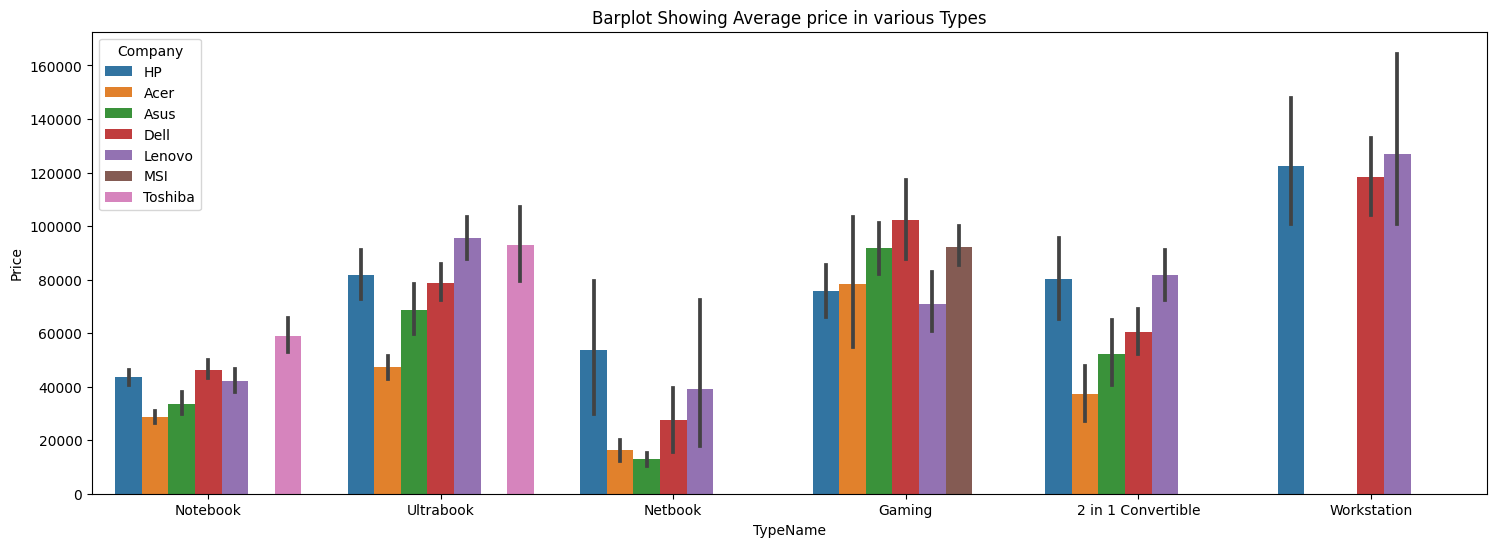

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='TypeName',y='Price',data=laptop_data_1,hue='Company')
plt.title('Barplot Showing Average price in various Types')

Text(0.5, 1.0, 'Barplot Showing Average price in various OpSys')

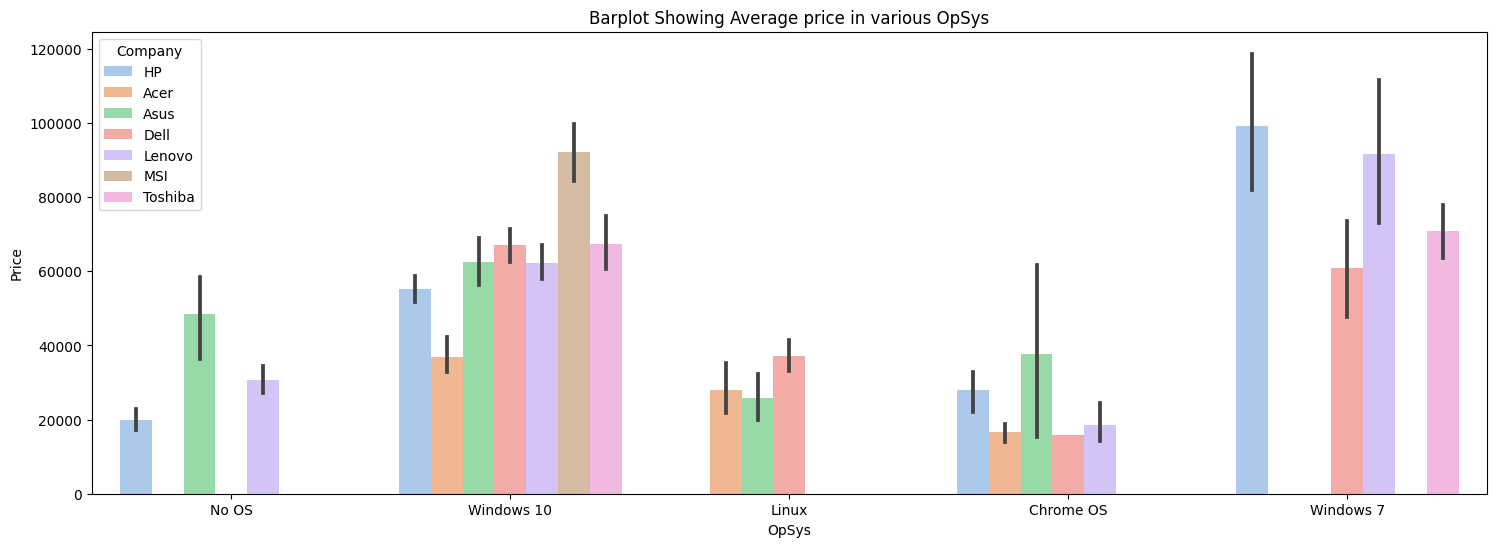

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='OpSys',y='Price',data=laptop_data_1,hue='Company',palette='pastel')
plt.title('Barplot Showing Average price in various OpSys')

### Histograms

<Axes: xlabel='Price', ylabel='Count'>

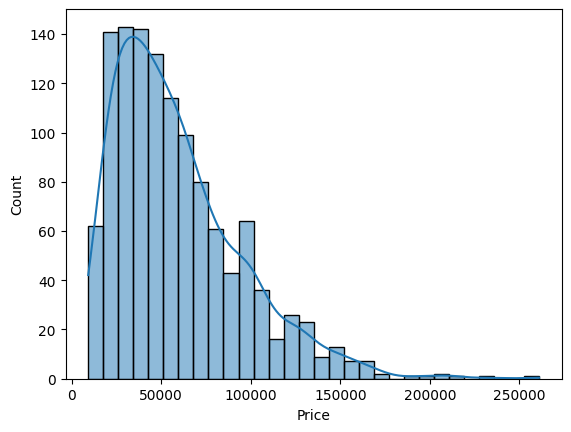

In [ ]:
sns.histplot(x='Price',data=laptop_data_1,kde=True)

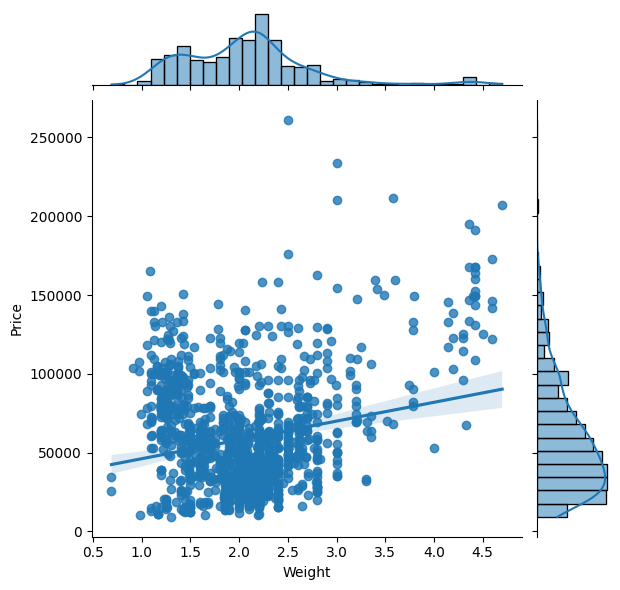

In [ ]:
sns.jointplot(x='Weight',y='Price',data=laptop_data_1,kind='reg')

<Axes: xlabel='Inches', ylabel='Price'>

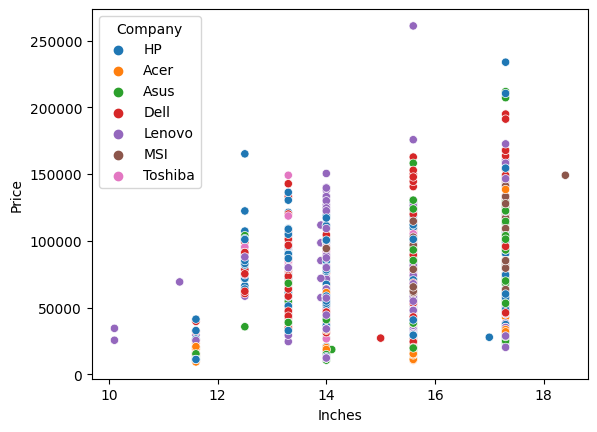

In [ ]:
sns.scatterplot(x='Inches',y='Price',data=laptop_data_1,hue='Company')

## Creating dummy variables for categorical variables

In [ ]:
pd.get_dummies(laptop_data_1['Company'])

,Acer,Asus,Dell,HP,Lenovo,MSI,Toshiba
2,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0
10,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1298,0,0,0,0,1,0,0
1299,0,0,0,0,1,0,0
1300,0,0,0,0,1,0,0
1301,0,0,0,1,0,0,0


In [ ]:
laptop_data_1=laptop_data_1.join(pd.get_dummies(laptop_data_1['Company']))

In [ ]:
laptop_data_1=laptop_data_1.join(pd.get_dummies(laptop_data_1['TypeName']))

In [ ]:
laptop_data_1

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,HP,Lenovo,MSI,Toshiba,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1,0,0,0,0,0,0,1,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,...,0,0,0,0,0,0,0,1,0,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,...,0,0,0,0,0,0,0,0,1,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,...,0,0,0,0,0,0,0,0,1,0
10,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,0,1,0,0,1,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,0,1,0,0,1,0,0,0,0,0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,0,1,0,0,0,0,0,1,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,1,0,0,0,0,0,0,1,0,0


### Splitting ScreenResolution

In [ ]:
laptop_data_1['ScreenResolution_new']=laptop_data_1['ScreenResolution'].str.split(" ").str[-1]

In [ ]:
laptop_data_1[['ScreenResolution_H','ScreenResolution_W']]=laptop_data_1['ScreenResolution_new'].str.split("x",n=1,expand=True)

### Splitting Cpu into brand and amount

In [ ]:
laptop_data_1['Cpu_Brand']=laptop_data_1['Cpu'].str.split(" ").str[0]
laptop_data_1['Cpu_Freq']=laptop_data_1['Cpu'].str.split(" ").str[-1]

### Removing "GHz" from CPU amount

In [ ]:
laptop_data_1['Cpu_Freq']=laptop_data_1['Cpu_Freq'].str[:-3].astype('float')

### Removing "GB" from RAM

In [ ]:
laptop_data_1['RAM']=laptop_data_1['Ram'].str[:-2].astype('int')

In [ ]:
laptop_data_1['ScreenResolution_H']=laptop_data_1['ScreenResolution_H'].astype('float')
laptop_data_1['ScreenResolution_W']=laptop_data_1['ScreenResolution_W'].astype('float')

In [ ]:
laptop_data_1['Gpu_brand']=laptop_data_1['Gpu'].str.split(" ").str[0]

In [ ]:
laptop_data_1[['Memory_1','Extra Memory']]=laptop_data_1['Memory'].str.split("+",n=1,expand=True)

In [ ]:
laptop_data_1=laptop_data_1.drop("Memory",axis=1)

In [ ]:
laptop_data_1[['Memory size','Memory Type']]=laptop_data_1['Memory_1'].str.split(" ",n=1,expand=True)

In [ ]:
laptop_data_1['Memory Unit']=laptop_data_1['Memory size'].str[-2:]

In [ ]:
laptop_data_1['Memory size']=laptop_data_1['Memory size'].str[:-2].astype('float')

In [ ]:
laptop_data_1=laptop_data_1.drop("Memory_1",axis=1)

In [ ]:
def convert_into_MB(value):
    if value== "GB":
        return 1000
    else:return 1000000


In [ ]:
laptop_data_1['Memory Unit']=laptop_data_1['Memory Unit'].apply(convert_into_MB)

In [ ]:
laptop_data_1['Memory size']=laptop_data_1['Memory size']*laptop_data_1['Memory Unit']

In [ ]:
laptop_data_1=laptop_data_1.drop("Memory Unit",axis=1)

In [ ]:
laptop_data_1['Extra Memory'].value_counts()

  1TB HDD         184
  2TB HDD          15
  256GB SSD         3
  500GB HDD         2
  1.0TB Hybrid      2
  512GB SSD         1
Name: Extra Memory, dtype: int64

In [ ]:
def extra_memory(df):
    if df == None :
        return 0
    else: return 1

In [ ]:
laptop_data_1['Extra']=laptop_data_1['Extra Memory'].apply(extra_memory)

In [ ]:
laptop_data_1[laptop_data_1['Extra']==1].sum()

Company                 LenovoDellDellDellAsusMSIDellMSIDellHPDellAsus...
TypeName                GamingUltrabookNotebookGamingGamingGamingNoteb...
Inches                                                             3384.7
ScreenResolution        IPS Panel Full HD 1920x1080Full HD 1920x1080IP...
Cpu                     Intel Core i5 7300HQ 2.5GHzIntel Core i7 8650U...
Ram                     8GB8GB8GB16GB8GB16GB16GB8GB8GB8GB16GB16GB12GB1...
Gpu                     Nvidia GeForce GTX 1050Intel UHD Graphics 620A...
OpSys                   Windows 10Windows 10Windows 10Windows 10Window...
Weight                                                             586.28
Price                                                       17863755.1632
Acer                                                                    6
Asus                                                                   55
Dell                                                                   53
HP                                    

In [ ]:
laptop_data_1=laptop_data_1.join(pd.get_dummies(laptop_data_1['Cpu_Brand']))

In [ ]:
laptop_data_1.rename(columns={'Intel':'Intel_Cpu'},inplace=True)

In [ ]:
laptop_data_1.rename(columns={'AMD':'AMD_Cpu'},inplace=True)

In [ ]:
laptop_data_1=laptop_data_1.join(pd.get_dummies(laptop_data_1['Gpu_brand']))

In [ ]:
laptop_data_1=laptop_data_1.join(pd.get_dummies(laptop_data_1['OpSys']))

In [ ]:
laptop_data_1['Memory Type'].value_counts()

SSD               588
HDD               372
SSD               205
Flash Storage      50
Hybrid             10
Flash Storage       1
HDD                 1
Name: Memory Type, dtype: int64

In [ ]:
laptop_data_1=laptop_data_1.join(pd.get_dummies(laptop_data_1['Memory Type']))

In [ ]:
laptop_data_1['SSD_new']=laptop_data_1['SSD']+laptop_data_1['SSD ']

In [ ]:
laptop_data_1['HDD_new']=laptop_data_1['HDD']+laptop_data_1['HDD ']

In [ ]:
laptop_data_1.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,...,Windows 7,Flash Storage,Flash Storage,HDD,HDD,Hybrid,SSD,SSD,SSD_new,HDD_new
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,30636.000,...,0,0,0,0,0,0,1,0,1,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,AMD Radeon R5,Windows 10,2.10,21312.000,...,0,0,0,1,0,0,0,0,0,1
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,Nvidia GeForce MX150,Windows 10,1.30,79653.600,...,0,0,0,0,0,0,1,0,1,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,Intel UHD Graphics 620,Windows 10,1.60,41025.600,...,0,0,0,0,0,0,1,0,1,0
10,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,Intel HD Graphics 620,No OS,1.86,20986.992,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
laptop_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 2 to 1302
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1227 non-null   object 
 1   TypeName              1227 non-null   object 
 2   Inches                1227 non-null   float64
 3   ScreenResolution      1227 non-null   object 
 4   Cpu                   1227 non-null   object 
 5   Ram                   1227 non-null   object 
 6   Gpu                   1227 non-null   object 
 7   OpSys                 1227 non-null   object 
 8   Weight                1227 non-null   float64
 9   Price                 1227 non-null   float64
 10  Acer                  1227 non-null   uint8  
 11  Asus                  1227 non-null   uint8  
 12  Dell                  1227 non-null   uint8  
 13  HP                    1227 non-null   uint8  
 14  Lenovo                1227 non-null   uint8  
 15  MSI                  

## dropping unnecessary columns

In [ ]:
laptop_data_final=laptop_data_1.drop(['TypeName','ScreenResolution',"ScreenResolution_new",'Company','Ram','Gpu','Extra Memory','Cpu','Cpu_Brand','Gpu_brand','OpSys','HDD','HDD ','SSD','SSD ','Flash Storage '],axis=1)

In [ ]:
laptop_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 2 to 1302
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inches              1227 non-null   float64
 1   Weight              1227 non-null   float64
 2   Price               1227 non-null   float64
 3   Acer                1227 non-null   uint8  
 4   Asus                1227 non-null   uint8  
 5   Dell                1227 non-null   uint8  
 6   HP                  1227 non-null   uint8  
 7   Lenovo              1227 non-null   uint8  
 8   MSI                 1227 non-null   uint8  
 9   Toshiba             1227 non-null   uint8  
 10  2 in 1 Convertible  1227 non-null   uint8  
 11  Gaming              1227 non-null   uint8  
 12  Netbook             1227 non-null   uint8  
 13  Notebook            1227 non-null   uint8  
 14  Ultrabook           1227 non-null   uint8  
 15  Workstation         1227 non-null   uint8  
 16  Screen

In [ ]:
laptop_data_final.head(5)

,Inches,Weight,Price,Acer,Asus,Dell,HP,Lenovo,MSI,Toshiba,...,Nvidia,Chrome OS,Linux,No OS,Windows 10,Windows 7,Flash Storage,Hybrid,SSD_new,HDD_new
2,15.6,1.86,30636.000,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,15.6,2.10,21312.000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,14.0,1.30,79653.600,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
9,14.0,1.60,41025.600,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,15.6,1.86,20986.992,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
correlation_matrix=laptop_data_final.corr()
correlation_matrix

<ipython-input-76-bd21abaff31f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=laptop_data_final.corr()


,Inches,Weight,Price,Acer,Asus,Dell,HP,Lenovo,MSI,Toshiba,...,Nvidia,Chrome OS,Linux,No OS,Windows 10,Windows 7,Flash Storage,Hybrid,SSD_new,HDD_new
Inches,1.000000,0.820801,0.056978,-0.008626,0.105471,0.013746,-0.061901,-0.080427,0.208275,-0.109361,...,0.487096,-0.223564,0.086644,0.107115,0.006287,-0.081061,-0.339256,0.022163,-0.107342,0.252425
Weight,0.820801,1.000000,0.219815,0.041653,0.089511,0.060625,-0.135457,-0.056337,0.191241,-0.134491,...,0.563083,-0.126678,0.052038,0.046928,0.018325,-0.061731,-0.225496,0.027158,-0.046770,0.139815
Price,0.056978,0.219815,1.000000,-0.218240,0.003771,0.066320,-0.032145,-0.014305,0.199753,0.048401,...,0.357945,-0.141630,-0.169672,-0.191410,0.182713,0.169295,-0.212629,-0.040356,0.523670,-0.447392
Acer,-0.008626,0.041653,-0.218240,1.000000,-0.115532,-0.171069,-0.162317,-0.170309,-0.064951,-0.061080,...,0.014815,0.202727,0.144852,-0.070425,-0.088035,-0.059065,0.130855,-0.027440,-0.144872,0.100241
Asus,0.105471,0.089511,0.003771,-0.115532,1.000000,-0.215677,-0.204643,-0.214719,-0.081887,-0.077007,...,0.171098,0.003741,0.023650,-0.044449,0.049903,-0.074467,0.082202,-0.034596,-0.009320,-0.018206
Dell,0.013746,0.060625,0.066320,-0.171069,-0.215677,1.000000,-0.303016,-0.317936,-0.121251,-0.114025,...,-0.074254,-0.062019,0.182362,-0.131471,0.012959,-0.039403,-0.106851,-0.008900,0.016123,0.027773
HP,-0.061901,-0.135457,-0.032145,-0.162317,-0.204643,-0.303016,1.000000,-0.301670,-0.115047,-0.108191,...,-0.146637,-0.013461,-0.123698,-0.018341,0.020874,0.134839,-0.021434,0.016693,-0.053553,0.062564
Lenovo,-0.080427,-0.056337,-0.014305,-0.170309,-0.214719,-0.317936,-0.301670,1.000000,-0.120712,-0.113519,...,-0.039038,-0.032902,-0.129788,0.275254,-0.088392,0.022129,0.019088,0.055061,0.033282,-0.052565
MSI,0.208275,0.191241,0.199753,-0.064951,-0.081887,-0.121251,-0.115047,-0.120712,1.000000,-0.043292,...,0.314916,-0.028991,-0.049497,-0.049916,0.092412,-0.041864,-0.044223,-0.019449,0.150419,-0.133161
Toshiba,-0.109361,-0.134491,0.048401,-0.061080,-0.077007,-0.114025,-0.108191,-0.113519,-0.043292,1.000000,...,-0.083270,-0.027263,-0.046548,-0.046942,0.063764,0.005359,-0.041587,-0.018290,0.070142,-0.051101


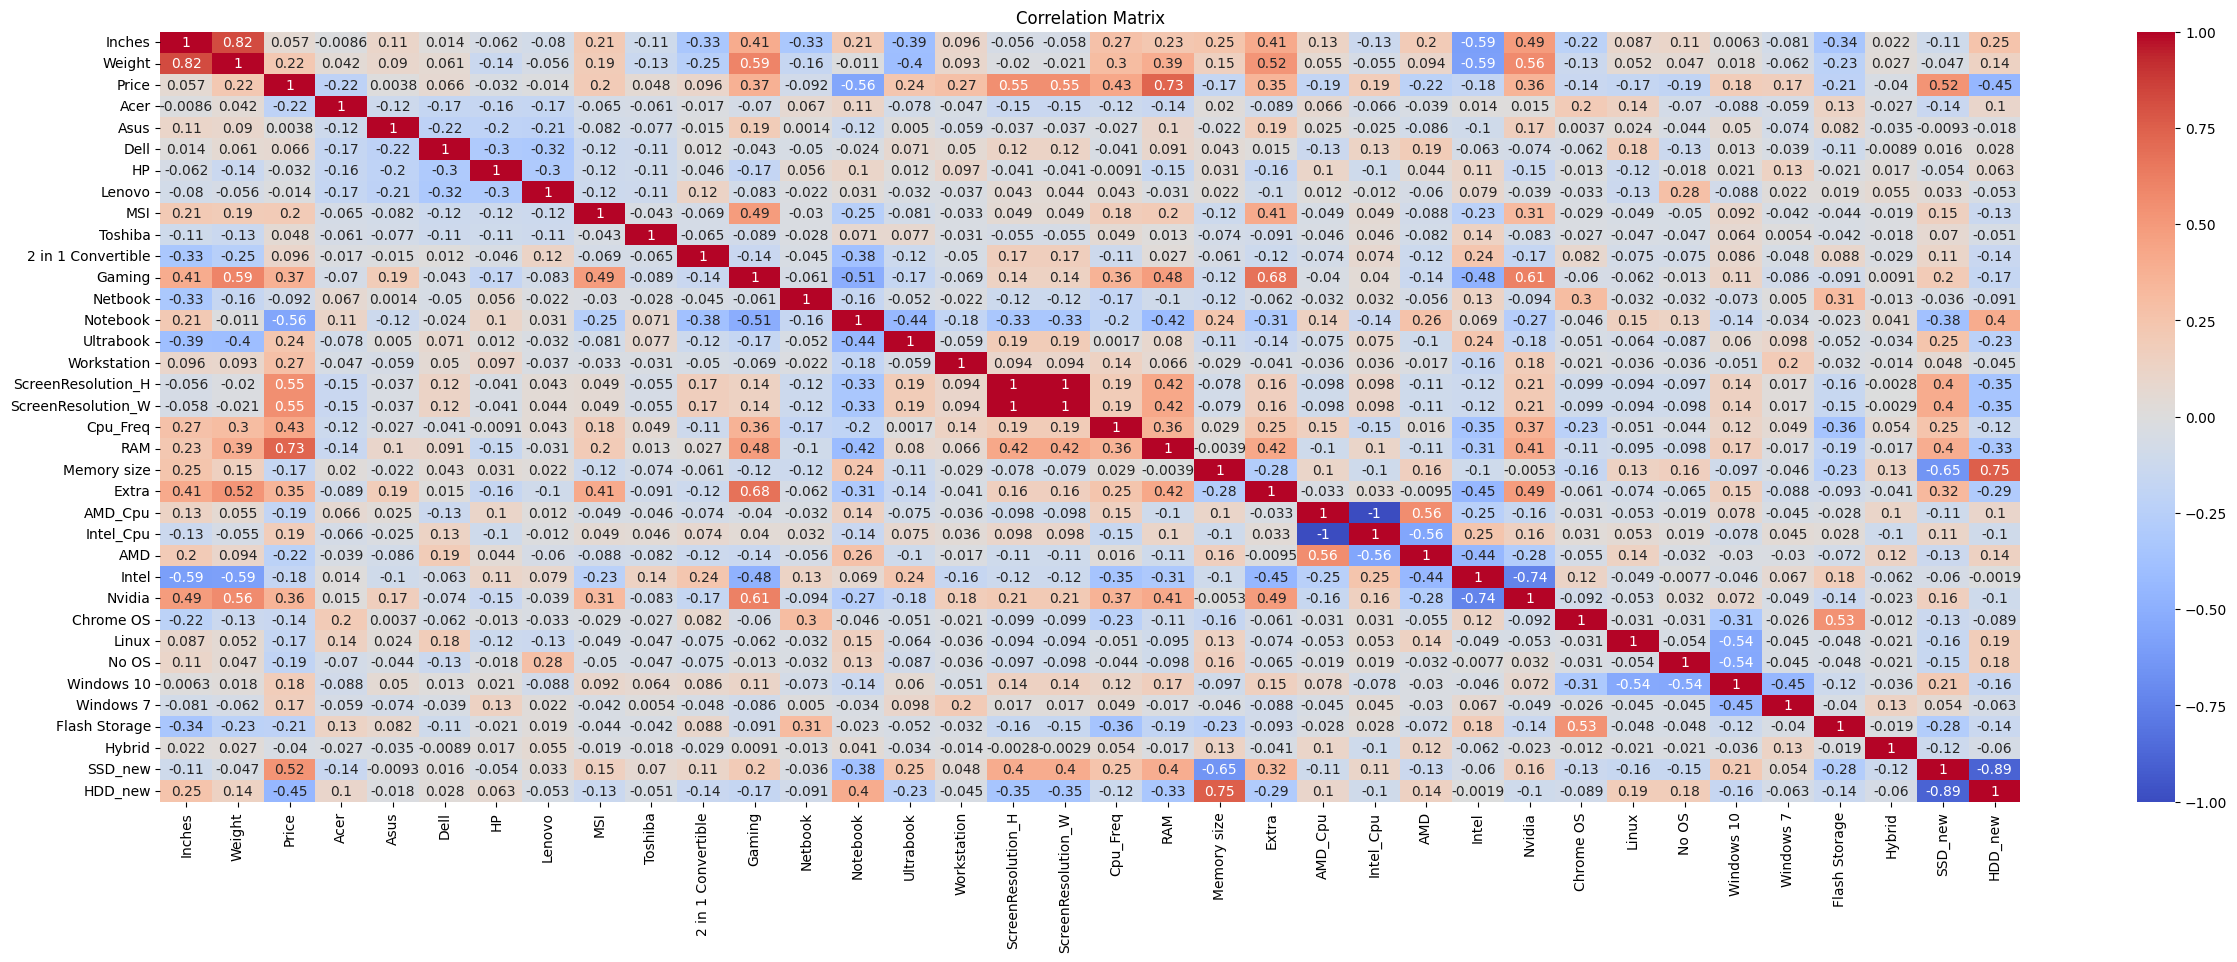

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Declare Target Variable

In [ ]:
X=laptop_data_final[["Weight","Acer","MSI","Gaming","Notebook","Ultrabook","Workstation","ScreenResolution_H","ScreenResolution_W","Cpu_Freq","RAM","Memory size","Extra","AMD_Cpu","Intel_Cpu","AMD","Intel","Nvidia","Chrome OS","Linux","No OS","Windows 10","Windows 7","SSD_new","HDD_new"]]

In [ ]:
Y=laptop_data_final['Price']

In [ ]:
X.shape

(1227, 25)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 2 to 1302
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              1227 non-null   float64
 1   Acer                1227 non-null   uint8  
 2   MSI                 1227 non-null   uint8  
 3   Gaming              1227 non-null   uint8  
 4   Notebook            1227 non-null   uint8  
 5   Ultrabook           1227 non-null   uint8  
 6   Workstation         1227 non-null   uint8  
 7   ScreenResolution_H  1227 non-null   float64
 8   ScreenResolution_W  1227 non-null   float64
 9   Cpu_Freq            1227 non-null   float64
 10  RAM                 1227 non-null   int64  
 11  Memory size         1227 non-null   float64
 12  Extra               1227 non-null   int64  
 13  AMD_Cpu             1227 non-null   uint8  
 14  Intel_Cpu           1227 non-null   uint8  
 15  AMD                 1227 non-null   uint8  
 16  Intel 

In [ ]:
Y.shape

(1227,)

## Split into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(858, 25)

In [ ]:
X_test.shape

(369, 25)

In [ ]:
Y_train.shape

(858,)

In [ ]:
Y_test.shape

(369,)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
model=lr.fit(X_train,Y_train)

In [ ]:
r_squared=lr.score(X_train,Y_train)
print("R-squared value for train dataset ",r_squared)

R-squared value for train dataset  0.7613413949522843


In [ ]:
r_squared=lr.score(X_test,Y_test)
print("R-squared value for test dataset",r_squared)

R-squared value for test dataset 0.7696675049269769


In [ ]:
Y_pred=lr.predict(X_test)

In [ ]:
Y_pred=pd.DataFrame(Y_pred,columns=["Predicted Price"])

In [ ]:
Y_pred.head(10)

,Predicted Price
0,69109.294632
1,40647.623368
2,79871.150665
3,64161.939531
4,78528.713727
5,87867.212465
6,50303.845194
7,104020.965211
8,54501.046690
9,56091.620908


In [ ]:
Y_pred.shape

(369, 1)

In [ ]:
print("model coefficient ",model.coef_)
print("model intercept",model.intercept_)

model coefficient  [ 6.72526552e+03 -6.47546320e+03  1.12899882e+04 -7.94573447e+03
 -1.11643798e+04  8.11841134e+03  3.60177790e+04  3.26995797e+01
 -2.88168964e+01  1.03912960e+04  2.89441919e+03 -1.46587357e-03
  1.30708983e+03 -5.19901045e+03  5.19901045e+03 -4.57570403e+03
  4.97206848e+03 -3.96364451e+02 -3.70755434e+03 -6.49092456e+03
 -1.07470730e+04  5.35986483e+02  2.04095654e+04  9.07835472e+03
  5.12742832e+02]
model intercept -40346.48650045918


In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Rmse value ",rmse)

Rmse value  16690.8502200672


In [ ]:
Y_test=pd.DataFrame(Y_test)

In [ ]:
Y_test.shape

(369, 1)

In [ ]:
Y_test.head(5)

,Price
145,58554.7200
126,43263.3600
1106,80516.2032
499,48538.0800
328,71128.8000


In [ ]:
Y_test=Y_test.reset_index(drop=True)

In [ ]:
X_test=X_test.reset_index(drop=True)

In [ ]:
Test_data=pd.DataFrame(X_test.join(Y_test.join(Y_pred)))

In [ ]:
Test_data.head(5)

,Weight,Acer,MSI,Gaming,Notebook,Ultrabook,Workstation,ScreenResolution_H,ScreenResolution_W,Cpu_Freq,...,Nvidia,Chrome OS,Linux,No OS,Windows 10,Windows 7,SSD_new,HDD_new,Price,Predicted Price
0,1.25,0,0,0,0,1,0,1920.0,1080.0,1.8,...,0,0,0,0,1,0,1,0,58554.7200,69109.294632
1,1.63,0,0,0,1,0,0,1920.0,1080.0,1.6,...,0,0,0,0,1,0,0,1,43263.3600,40647.623368
2,2.90,0,1,1,0,0,0,1920.0,1080.0,2.6,...,1,0,0,0,1,0,1,0,80516.2032,79871.150665
3,2.30,0,0,0,1,0,0,1920.0,1080.0,2.5,...,0,0,0,0,1,0,1,0,48538.0800,64161.939531
4,1.26,0,0,0,0,1,0,1920.0,1080.0,2.7,...,0,0,0,0,1,0,1,0,71128.8000,78528.713727


In [ ]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              369 non-null    float64
 1   Acer                369 non-null    uint8  
 2   MSI                 369 non-null    uint8  
 3   Gaming              369 non-null    uint8  
 4   Notebook            369 non-null    uint8  
 5   Ultrabook           369 non-null    uint8  
 6   Workstation         369 non-null    uint8  
 7   ScreenResolution_H  369 non-null    float64
 8   ScreenResolution_W  369 non-null    float64
 9   Cpu_Freq            369 non-null    float64
 10  RAM                 369 non-null    int64  
 11  Memory size         369 non-null    float64
 12  Extra               369 non-null    int64  
 13  AMD_Cpu             369 non-null    uint8  
 14  Intel_Cpu           369 non-null    uint8  
 15  AMD                 369 non-null    uint8  
 16  Intel   

In [ ]:
Test_data['Diff']=Test_data['Price']-Test_data['Predicted Price']

In [ ]:
Test_data.head(5)

,Weight,Acer,MSI,Gaming,Notebook,Ultrabook,Workstation,ScreenResolution_H,ScreenResolution_W,Cpu_Freq,...,Chrome OS,Linux,No OS,Windows 10,Windows 7,SSD_new,HDD_new,Price,Predicted Price,Diff
0,1.25,0,0,0,0,1,0,1920.0,1080.0,1.8,...,0,0,0,1,0,1,0,58554.7200,69109.294632,-10554.574632
1,1.63,0,0,0,1,0,0,1920.0,1080.0,1.6,...,0,0,0,1,0,0,1,43263.3600,40647.623368,2615.736632
2,2.90,0,1,1,0,0,0,1920.0,1080.0,2.6,...,0,0,0,1,0,1,0,80516.2032,79871.150665,645.052535
3,2.30,0,0,0,1,0,0,1920.0,1080.0,2.5,...,0,0,0,1,0,1,0,48538.0800,64161.939531,-15623.859531
4,1.26,0,0,0,0,1,0,1920.0,1080.0,2.7,...,0,0,0,1,0,1,0,71128.8000,78528.713727,-7399.913727


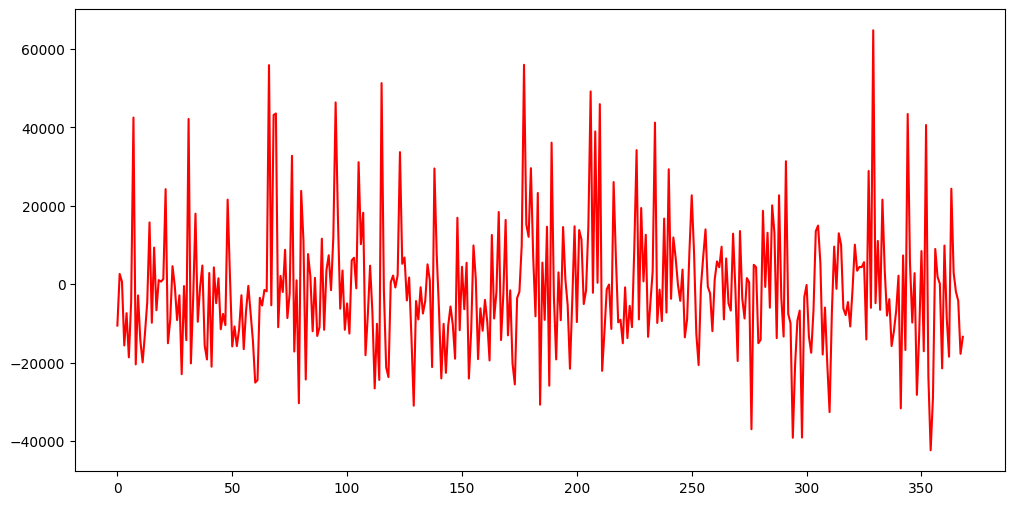

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Test_data['Diff'],color='red')

In [ ]:
Test_data['Diff'].describe()

count      369.000000
mean     -1019.506566
std      16682.304578
min     -42362.807728
25%     -11415.966614
50%      -2864.900908
75%       6565.818838
max      64759.582697
Name: Diff, dtype: float64

In [ ]:
Test_data.to_csv('/content/test_data.csv')